In [458]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from jupyterthemes import jtplot
from sklearn.metrics import auc, roc_curve, roc_auc_score
%matplotlib inline
jtplot.style()

In [459]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [460]:
Id = test['Id']
y_train = train['SalePrice']

In [461]:
y_train.shape

(1460,)

In [462]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [574]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Убираем столбцы где много пропусков

In [463]:
Xtrain = train.drop(["Alley", "FireplaceQu", "Id" ,"PoolQC", "Fence", "MiscFeature", "SalePrice"], axis=1)
Xtest = test.drop(["Alley", "FireplaceQu", "Id" ,"PoolQC", "Fence", "MiscFeature"], axis=1)
Xtrain['is_test'] = False
Xtest['is_test'] = True
X = pd.concat([Xtrain, Xtest], axis=0)
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 75 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non-null object
MasVnrType       2895 no

In [464]:
All_int_type_colum=(X.select_dtypes(include=['int64']).columns)
All_float_type_colum=(X.select_dtypes(include=['float']).columns)
All_obj_type_colum=(X.select_dtypes(include=['object']).columns)

Пустые чиловые данные заполняем медианами

In [465]:
for i in All_int_type_colum:
     X[i].fillna(X[i].median(), inplace=True)
for i in All_float_type_colum:
     X[i].fillna(X[i].median(), inplace=True)
    


In [466]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,is_test
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,False
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,False
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,False
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,False
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,False


In [467]:

X = pd.get_dummies(X, columns=All_obj_type_colum)



In [468]:
Xtrain_prep = X[X.is_test==False].drop(['is_test'], axis=1)
Xtest_prep = X[X.is_test==True].drop(['is_test'], axis=1)

In [469]:
from sklearn.ensemble import RandomForestRegressor

In [470]:
clf_rf = RandomForestRegressor(n_estimators=10, max_depth=5, min_samples_leaf=20, max_features=0.5, n_jobs=-1)
clf_rf.fit(Xtrain_prep, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features=0.5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [471]:
y_pred=clf_rf.predict(Xtest_prep)
y_pred

array([125047.45413895, 149565.32616219, 182418.12681719, ...,
       145184.87441532, 122573.78101937, 220584.99400407])

In [472]:
Xtrain_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 270 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(11), int64(25), uint8(234)
memory usage: 755.7 KB


In [473]:
imp = pd.Series(clf_rf.feature_importances_)
imp.sort_values(ascending=False)[:10]

3      0.450692
25     0.136355
168    0.133601
15     0.131542
26     0.026342
12     0.020611
11     0.017071
8      0.014843
5      0.009418
22     0.009382
dtype: float64

In [474]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(clf_rf, Xtrain_prep, y_train):
    return r2_score(y_train, clf_rf.predict(Xtrain_prep))

perm_imp_rfpimp = permutation_importances(clf_rf, Xtrain_prep, y_train, r2)

In [476]:
perm_imp_rfpimp[:12]

,Importance
Feature,
OverallQual,0.350697
GrLivArea,0.134705
ExterQual_TA,0.049881
GarageCars,0.034759
TotalBsmtSF,0.014220
1stFlrSF,0.013700
BsmtFinSF1,0.013177
LotArea,0.008613
YearBuilt,0.005548


In [477]:
r2_score(y_train, clf_rf.predict(Xtrain_prep))

0.8380806942399437

In [478]:
y_train.shape

(1460,)

In [479]:
Xtrain_prep.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


Берем весомые признаки

In [480]:
need_col=['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'BsmtFinSF1', '2ndFlrSF', 'FullBath', 'is_test']


In [481]:
Xtrain_prep['is_test'] = False
Xtest_prep['is_test'] = True
X = pd.concat([Xtrain_prep, Xtest_prep], axis=0)

In [482]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,is_test
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,0,0,0,0,1,0,False
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,0,0,0,0,1,0,False
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,0,0,0,0,1,0,False
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,1,0,0,0,0,0,False
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,0,0,0,0,1,0,False


Убираем малозначимые признаки

In [483]:
for column in X.columns:
    for col in need_col:
        if column in need_col:
            pass
        else:
            try:
                X = X.drop([column], axis=1)
            except KeyError:
                pass
            

In [484]:
X.head()

,OverallQual,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,GarageCars,is_test
0,7,706.0,856.0,856,854,1710,2,2.0,False
1,6,978.0,1262.0,1262,0,1262,2,2.0,False
2,7,486.0,920.0,920,866,1786,2,2.0,False
3,7,216.0,756.0,961,756,1717,1,3.0,False
4,8,655.0,1145.0,1145,1053,2198,2,3.0,False


In [485]:
Xtrain_prep_new = X[X.is_test==False].drop(['is_test'], axis=1)
Xtest_prep_new = X[X.is_test==True].drop(['is_test'], axis=1)

In [487]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [488]:
lr.fit(Xtrain_prep_new, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [489]:
y_pred_lr=lr.predict(Xtest_prep_new)

In [490]:
y_pred_lr

array([108476.87017465, 171505.99948822, 169197.12643466, ...,
       164318.21122738,  92863.78912068, 250959.54290216])

In [491]:
r2_score(y_train, lr.predict(Xtrain_prep_new))

0.7740383904801591

In [492]:
from sklearn import neighbors

In [493]:
n_neighbors = 5
knn = neighbors.KNeighborsRegressor( n_neighbors)

In [494]:
knn.fit(Xtrain_prep_new , y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [495]:
y_pred_knn=knn.predict(Xtest_prep_new)
y_pred_knn 

array([119100. , 201591.2, 198100. , ..., 164011.8, 119750. , 242500. ])

In [496]:
r2_score(y_train, knn.predict(Xtrain_prep_new))

0.7933070349968465

In [497]:
y_pred_knn

array([119100. , 201591.2, 198100. , ..., 164011.8, 119750. , 242500. ])

In [527]:
from sklearn.metrics import explained_variance_score as EVS


Стекинг

In [575]:
def get_meta_features(clf, X_train, y_train, X_test, stack_cv):
    meta_train = np.zeros_like(y_train, dtype=float)
    meta_test = np.zeros_like(X_test['OverallQual'], dtype=float)
    
    for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, y_train)):
        clf.fit(X_train.iloc[train_ind], y_train.iloc[train_ind])
        meta_train[test_ind] = clf.predict(X_train.iloc[test_ind])
        meta_test += clf.predict(X_test)
    print('EVS: '+str(EVS(y_train, clf.predict(X_train)))+'\n')
    return meta_train, meta_test / stack_cv.n_splits

In [576]:
from sklearn.model_selection import StratifiedKFold

stack_cv = StratifiedKFold(n_splits=10, random_state=555)

meta_train = []
meta_test = []
col_names = []

print('LR features...')
meta_tr, meta_te = get_meta_features(lr, Xtrain_prep_new, y_train, Xtest_prep_new, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('lr_pred')

print('RF features...')
meta_tr, meta_te = get_meta_features(clf_rf, Xtrain_prep_new, y_train, Xtest_prep_new, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('rf_pred')

print('kNN features...')
meta_tr, meta_te = get_meta_features(knn, Xtrain_prep_new, y_train, Xtest_prep_new, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('knn_pred')

LR features...


C:\Users\663806\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


EVS: 0.774036931023295

RF features...


C:\Users\663806\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


EVS: 0.8247273959139353

kNN features...


C:\Users\663806\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


EVS: 0.8252348344953199



In [530]:
X_meta_train = pd.DataFrame(np.stack(meta_train, axis=1), columns=col_names)
X_meta_test = pd.DataFrame(np.stack(meta_test, axis=1), columns=col_names)

In [531]:
X_meta_train.head()

,lr_pred,rf_pred,knn_pred
0,204297.034050,186193.389223,206780.0
1,181990.648975,167143.879067,186700.0
2,203644.505735,191983.147076,189980.0
3,200640.823779,179106.757033,178780.0
4,252445.397030,257631.660038,222300.0


Обучаем метаданные на KNN регрессии 

In [564]:
n_neighbors = 3
knn = neighbors.KNeighborsRegressor( n_neighbors)
knn.fit(X_meta_train , y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [565]:
y_pred_meta_test = knn.predict(X_meta_train)

y_pred_meta_test

array([198133.33333333, 185000.        , 214458.33333333, ...,
       214933.33333333, 126201.66666667, 153466.66666667])

In [566]:
EVS(y_train, knn.predict(X_meta_train))


0.888617113661737

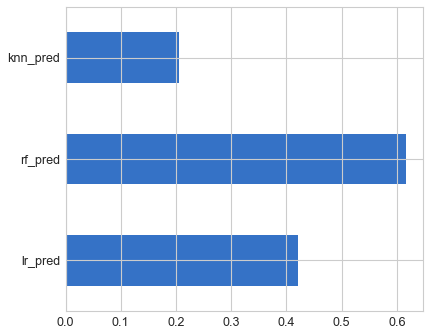

In [560]:
pd.Series(clf_lr_meta.coef_.flatten(), index=X_meta_train.columns).plot(kind='barh')